#**Autoencoder Model for Word Embedding**

#I. Import necessary things

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import re
import os
import pickle
import nltk
import numpy as np
from scipy.spatial import distance

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#II. Load corpus and preprocess it

Data from https://www.kaggle.com/datasets/aneeshtickoo/tweets-after-queen-elizabeth-iis-death

In [2]:
# Load data
def load_data(csv_file):
    return pd.read_csv(csv_file, encoding="latin")
    
train_data = load_data("queen.csv").iloc[:5000]


In [3]:
train_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [4]:
corpus = train_data["tweet"].to_list()
corpus = "\n".join(corpus)
print(corpus[:1000])

We at In Professional Development join with people across the United Kingdom and around the world in mourning the death of Her Majesty Queen Elizabeth II.  We extend our deepest condolences to His Majesty and to all members of the Royal Family.   https://t.co/m61LCMg66Q  https://t.co/YxLmbEarrB
Join us in remembering Her Majesty Queen Elizabeth II, whose passing has brought great sadness to the team here at UK Postbox.  We pass our condolences to the Royal Family and anyone affected during this difficult time.  https://t.co/T800hclNJo
"When life seems hard, the courageous do not lie down and accept defeat; instead, they are all the more determined to struggle for a better future."   - Queen Elizabeth II (1926-2022)   #queenelizabeth #worldchanger #leadership  https://t.co/74X7t8a3Ax
We join the nation in mourning the death of Her Majesty Queen Elizabeth II. Our heartfelt thoughts are with the Royal Family, the Nation and the Commonwealth at this time.  https://t.co/r8H56ZhUCc
We are sa

In [5]:
def text_cleaner(text):
    # lower case text
    text = text.lower()
    text = re.sub(r"'s\b","",text)
    # remove punctuations
    text = re.sub("[^a-zA-Z]", " ", text)
    return text

In [6]:
text_cleaner(corpus[:1000])

'we at in professional development join with people across the united kingdom and around the world in mourning the death of her majesty queen elizabeth ii   we extend our deepest condolences to his majesty and to all members of the royal family    https   t co m  lcmg  q  https   t co yxlmbearrb join us in remembering her majesty queen elizabeth ii  whose passing has brought great sadness to the team here at uk postbox   we pass our condolences to the royal family and anyone affected during this difficult time   https   t co t   hclnjo  when life seems hard  the courageous do not lie down and accept defeat  instead  they are all the more determined to struggle for a better future       queen elizabeth ii                queenelizabeth  worldchanger  leadership  https   t co   x t a ax we join the nation in mourning the death of her majesty queen elizabeth ii  our heartfelt thoughts are with the royal family  the nation and the commonwealth at this time   https   t co r h  zhucc we are s

In [7]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def preprocess_text(corpus):
  corpus_clean = text_cleaner(corpus)

  #stop words: a, be, can, I, so... 
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(corpus_clean)
  
  return [w for w in word_tokens if not w in stop_words]

corpus_token =  preprocess_text(corpus)
print(corpus_token)

['professional', 'development', 'join', 'people', 'across', 'united', 'kingdom', 'around', 'world', 'mourning', 'death', 'majesty', 'queen', 'elizabeth', 'ii', 'extend', 'deepest', 'condolences', 'majesty', 'members', 'royal', 'family', 'https', 'co', 'lcmg', 'q', 'https', 'co', 'yxlmbearrb', 'join', 'us', 'remembering', 'majesty', 'queen', 'elizabeth', 'ii', 'whose', 'passing', 'brought', 'great', 'sadness', 'team', 'uk', 'postbox', 'pass', 'condolences', 'royal', 'family', 'anyone', 'affected', 'difficult', 'time', 'https', 'co', 'hclnjo', 'life', 'seems', 'hard', 'courageous', 'lie', 'accept', 'defeat', 'instead', 'determined', 'struggle', 'better', 'future', 'queen', 'elizabeth', 'ii', 'queenelizabeth', 'worldchanger', 'leadership', 'https', 'co', 'x', 'ax', 'join', 'nation', 'mourning', 'death', 'majesty', 'queen', 'elizabeth', 'ii', 'heartfelt', 'thoughts', 'royal', 'family', 'nation', 'commonwealth', 'time', 'https', 'co', 'r', 'h', 'zhucc', 'saddened', 'death', 'majesty', 'quee

In [8]:
len(corpus_token)
# contains dupplicate

95112

In [9]:
dictionary = sorted(list(set(corpus_token)))
print(len(dictionary))
print(type(dictionary))

if os.path.exists("queen_mapping.pkl"):
  print("Load mapping")
  mapping = pickle.load(open("queen_mapping.pkl", "rb"))
else:
  print("Save mapping")
  mapping = dict((c, i) for i, c in enumerate(dictionary))
  pickle.dump(mapping, open("queen_mapping.pkl", "wb"))

print(dictionary)
#mapping: word -> number

15698
<class 'list'>
Save mapping
['aa', 'aac', 'aad', 'aaeitefuao', 'aakhri', 'aamcsk', 'aan', 'aanalytical', 'aaovycv', 'aapne', 'aarohi', 'aaron', 'aaronramsey', 'aask', 'aawb', 'aayjbtv', 'aazhuzmfwm', 'aazp', 'ab', 'aba', 'ababa', 'abacha', 'aback', 'abadde', 'abandoned', 'abbey', 'abc', 'abdicate', 'abdicated', 'abdullah', 'abe', 'abeg', 'abeoopabj', 'aber', 'aberdeen', 'aberdeenshire', 'abeth', 'abf', 'abhi', 'abhorrent', 'abijitg', 'ability', 'ablauf', 'able', 'ablebens', 'abline', 'abobaku', 'abolish', 'abolished', 'abolishthemonarchy', 'abounds', 'abq', 'abschied', 'absolute', 'absolutely', 'abstract', 'abt', 'abubakar', 'abundant', 'abuse', 'abutuukiriza', 'abwick', 'ac', 'aca', 'academia', 'academic', 'academies', 'academy', 'acara', 'acca', 'accaindia', 'accanews', 'accents', 'accept', 'acceptance', 'accepted', 'access', 'accessed', 'accession', 'accident', 'accidentally', 'accolades', 'accompanied', 'according', 'accordingly', 'account', 'accountancy', 'accounts', 'accuwe

#III. Convert corpus to one-hot vectors & Define embedding dim

In [10]:
embedding_dim = 256
vocab_size = len(dictionary)
print(vocab_size)

15698


In [11]:
corpus_encode = [mapping[x] for x in corpus_token]
corpus_encode


[10421,
 3078,
 6728,
 9903,
 108,
 13829,
 7072,
 649,
 14790,
 8553,
 2904,
 7977,
 10774,
 3702,
 6053,
 4116,
 2944,
 2416,
 7977,
 8202,
 11494,
 4198,
 5845,
 2252,
 7420,
 10583,
 5845,
 2252,
 15440,
 6728,
 13928,
 11162,
 7977,
 10774,
 3702,
 6053,
 14618,
 9814,
 1583,
 5167,
 11691,
 12948,
 13733,
 10254,
 9806,
 2416,
 11494,
 4198,
 545,
 203,
 3152,
 13205,
 5845,
 2252,
 5450,
 7573,
 11883,
 5388,
 2564,
 7567,
 73,
 2947,
 6272,
 3069,
 12637,
 1173,
 4702,
 10774,
 3702,
 6053,
 10783,
 14791,
 7436,
 5845,
 2252,
 14928,
 881,
 6728,
 8796,
 8553,
 2904,
 7977,
 10774,
 3702,
 6053,
 5489,
 13158,
 11494,
 4198,
 8796,
 2357,
 13205,
 5845,
 2252,
 10881,
 5318,
 15531,
 11687,
 2904,
 7977,
 10774,
 3702,
 6053,
 13158,
 4198,
 203,
 8915,
 8040,
 11243,
 13205,
 8797,
 8553,
 10256,
 2797,
 4532,
 14457,
 5623,
 4569,
 10774,
 968,
 11013,
 10774,
 3702,
 6053,
 4109,
 2944,
 12818,
 9814,
 5664,
 10774,
 3702,
 6053,
 2938,
 13733,
 11023,
 434,
 13015,
 13853,

In [12]:
onehot_corpus = keras.utils.to_categorical(corpus_encode, num_classes=vocab_size)
print(onehot_corpus)
print(len(onehot_corpus))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
95112


#IV. Define Autoencoder model

In [13]:
ae_model = keras.Sequential()
ae_model.add(keras.Input(shape=(vocab_size,)))
ae_model.add(keras.layers.Dense(embedding_dim, activation='relu'))
ae_model.add(keras.layers.Dense(vocab_size, activation='softmax'))

ae_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

if os.path.exists("queen_ae_model.h5"):
  ae_model.load_weights("queen_ae_model.h5")

ae_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4018944   
                                                                 
 dense_1 (Dense)             (None, 15698)             4034386   
                                                                 
Total params: 8,053,330
Trainable params: 8,053,330
Non-trainable params: 0
_________________________________________________________________


#V. Train AE model

In [14]:
# Train model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ae_model.h5", monitor='val_loss', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

ae_model.fit(x=onehot_corpus, y=onehot_corpus, batch_size=512, epochs=100,
          validation_split=0.2, validation_freq=1, shuffle=True,
          callbacks=[checkpoint_cb, early_stopping_cb],
          workers=1, use_multiprocessing=True)

ae_model.save("queen_ae_model.h5")

Epoch 1/100
149/149 [==============================] - 93s 616ms/step - loss: 7.6289 - accuracy: 0.2415 - val_loss: 6.1014 - val_accuracy: 0.1408
Epoch 2/100
149/149 [==============================] - 86s 576ms/step - loss: 5.0980 - accuracy: 0.3401 - val_loss: 4.3263 - val_accuracy: 0.5215
Epoch 3/100
149/149 [==============================] - 84s 565ms/step - loss: 3.4266 - accuracy: 0.6203 - val_loss: 3.4002 - val_accuracy: 0.6752
Epoch 4/100
149/149 [==============================] - 84s 565ms/step - loss: 2.6795 - accuracy: 0.7184 - val_loss: 3.0361 - val_accuracy: 0.7351
Epoch 5/100
149/149 [==============================] - 84s 561ms/step - loss: 2.3037 - accuracy: 0.7616 - val_loss: 2.8567 - val_accuracy: 0.7622
Epoch 6/100
149/149 [==============================] - 83s 558ms/step - loss: 2.0652 - accuracy: 0.7886 - val_loss: 2.7520 - val_accuracy: 0.7831
Epoch 7/100
149/149 [==============================] - 83s 559ms/step - loss: 1.8865 - accuracy: 0.8087 - val_loss: 2.6825 -

#=======================================================================

# **How to use trained model**

#=======================================================================

#VI. Load trained model & Get output of 1st FC layer

In [15]:
reconstructed_model = keras.models.load_model("queen_ae_model.h5")
we_model = keras.models.Model(inputs=reconstructed_model.inputs, outputs=reconstructed_model.get_layer('dense').output)

Define function to encode one-hot list of words

In [16]:
def encode_onehot(mapping, list_words):
  output = []
  
  for word in list_words:
    word_vector = [0 for _ in range(vocab_size)]

    if word in mapping.keys():
      word_index = mapping[word]
      word_vector[word_index] = 1
    
    output.append(word_vector)
  
  return output

#VII. Test model

In [17]:
input_sentence = "We are deeply saddened by the death of Her Majesty The Queen.   We extend our heartfelt sympathy to all of The Royal family and to all of those that her passing touches.  RIP - Queen Elizabeth II  1926 - 2022"

preprocess_sentence = preprocess_text(input_sentence)
onehot_sentence = encode_onehot(mapping, preprocess_sentence)

embedded_sentence = we_model.predict(onehot_sentence)
print(embedded_sentence)

[[0.02442467 0.8680843  0.8037766  ... 0.8717649  0.88056827 0.12848845]
 [0.8807862  0.15565771 0.38542837 ... 0.23444909 0.16774851 0.85591626]
 [0.08810872 0.5428564  0.8675074  ... 0.         0.44586363 0.84357536]
 ...
 [0.35460192 0.8324393  0.7847986  ... 0.02508602 0.9262037  0.56639695]
 [0.02791786 0.8378011  0.26596832 ... 0.8254297  0.34745145 0.380807  ]
 [0.89990544 0.8785041  0.9211905  ... 0.9059685  0.7924466  0.8778961 ]]


In [18]:
word_0 = "death"
word_1 = "queen"
word_2 = "royal"

preprocess_words = preprocess_text(' '.join([word_0, word_1, word_2]))
onehot_words = encode_onehot(mapping, preprocess_words)

word_0_eb, word_1_eb, word_2_eb = we_model.predict(onehot_words)

# print("OUTPUT EMBEDDING")
# print(word_0_eb)
# print(word_1_eb)
# print(word_2_eb)

dst_0_1 = distance.euclidean(word_0_eb, word_1_eb)
dst_1_2 = distance.euclidean(word_1_eb, word_2_eb)
dst_2_0 = distance.euclidean(word_2_eb, word_0_eb)

print("OUTPUT DISTANCE")
print("0 vs 1: ", dst_0_1)
print("1 vs 2: ", dst_1_2)
print("2 vs 0: ", dst_2_0)

OUTPUT DISTANCE
0 vs 1:  7.768218040466309
1 vs 2:  7.790938854217529
2 vs 0:  7.405043601989746


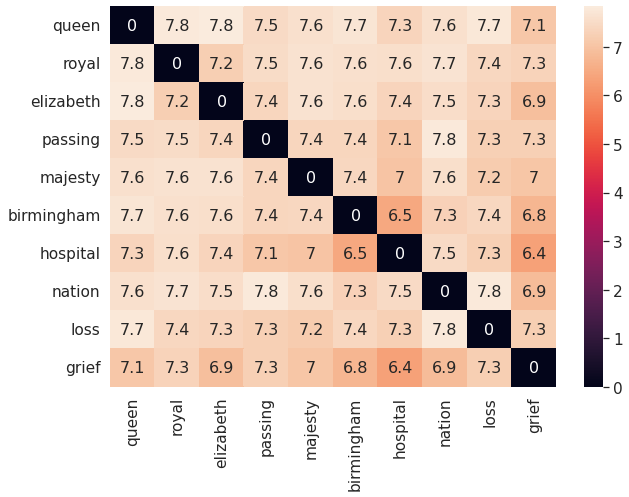

In [19]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

list_words = ["queen", "royal", "elizabeth", "passing", "majesty", "birmingham", "hospital", "nation", "loss", "grief"]
onehot_words = encode_onehot(mapping, list_words)
list_word_embs = we_model.predict(onehot_words)

dm = distance_matrix(list_word_embs, list_word_embs, p=2)

df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()